Have a script that gets enclosed fluxes. But I want to have a visual check of everything because I'm not I trust the final output values. As part of this, I'm also going to apply a region that is twice as large and see how that works.

In [2]:
import Source as S
from astropy.io import ascii
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read the file of information need
galaxy_table = ascii.read('/Users/adams/data/pvfit/btfr_table.txt')
print(len(galaxy_table))

22


In [4]:
coords = SkyCoord(galaxy_table['RA'],galaxy_table['Dec'])

Accounting for beam effect in minor axis


Accounting for beam effect in minor axis


WLM
5.2025661467210815 12.106543656337156 292.0
/Users/adams/data/pvfit/mom0_fits/WLM_R_X0_P_R.FITS
19.323396793976343
90.0 deg


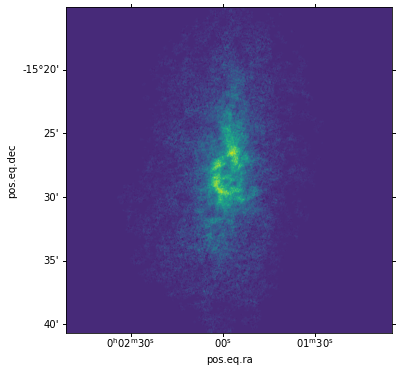

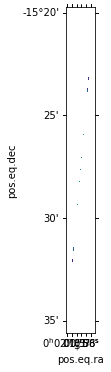

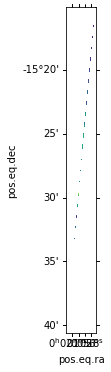

In [20]:
n=21
galaxy = galaxy_table['galaxy'][n]
galSource = S.Source(galaxy_table['galaxy'][n], coords[n].ra.deg, coords[n].dec.deg, galaxy_table['inc'][n]*u.deg, 
                     galaxy_table['PA'][n]*u.deg, galaxy_table['DPV'][n]*u.arcsec, galaxy_table['mom0path'][n])
if galaxy[0] == 'A':
    #shield
    encl_hi_flux = galSource.get_subcube_flux()
else:
    #convert m/s to km/s
    encl_hi_flux = galSource.get_subcube_flux() / 1000.


#set up a figure that I will add three suplots to
#fig = plt.figure()
#ax1 = fig.add_suplot(1,3,1, projection = galSource.mom0.wcs, slices = ('x', 'y', 0))
#ax1.imshow(galSource.mom0[0,:,:].value)
#but weirdly I can't use add_subplot? Some matplotlib issue probably. Will deal with later

fig, ax = plt.subplots(1, 1, figsize=(8,6),
                           subplot_kw={'projection': galSource.mom0.wcs,
                                      'slices': ('x', 'y', 0)})
ax.imshow(galSource.mom0[0,:,:].value)

fig, ax = plt.subplots(1, 1, figsize=(8,6),
                           subplot_kw={'projection': galSource.mom0_subcube.wcs,
                                      'slices': ('x', 'y', 0)})
ax.imshow(galSource.mom0_subcube[0,:,:].value)


galSource.get_source_ellipse(factor = 2)
if galaxy[0] == 'A':
    #shield
    encl_hi_flux_double = galSource.get_subcube_flux()
else:
    #convert m/s to km/s
    encl_hi_flux_double = galSource.get_subcube_flux() / 1000.


fig, ax = plt.subplots(1, 1, figsize=(8,6),
                           subplot_kw={'projection': galSource.mom0_subcube.wcs,
                                      'slices': ('x', 'y', 0)})
ax.imshow(galSource.mom0_subcube[0,:,:].value)

total_flux = galaxy_table['HIflux'][n]

#print flux that is w/in region and twice region
print(galaxy)
print(encl_hi_flux, encl_hi_flux_double, total_flux)

print(galaxy_table['mom0path'][n])
print(galSource.mom0_subcube.pixels_per_beam)
print(galSource.incl)